# CRH percentiles


In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

run="dpscream_rce_large_3km_aa_default"
var3d = "IWC"

run_dir = "/glade/derecho/scratch/sturbeville/DPSCREAM_simulations/"+run+"/run/"
ndays=5
vars2d = ["FLUT","FSUTOA","LWCF","SWCF","LHFLX","SHFLX","OMEGA500", "TMQ"]
vars3d = ["LWCF","SWCF"]

# CRH 3D with 2d on bottom


In [15]:
z = xr.open_dataset(
                    run_dir+
                    "dpscream_rce_large_3km_aa_default_Zmean_last5days.nc"
                   ).Z3.isel(time=0).isel(y=0).isel(ncol=0)
z=(z/1000).values

ds = xr.open_dataset(
                     run_dir+
                     f"dpscream_rce_large_default_{var3d.lower()}_binned_by_crhp.nc"
                    )[var3d]
files2d = [
           run_dir+"dpscream_rce_large_3km_aa_default_lwcf_binned_by_crhp.nc",
           run_dir+"dpscream_rce_large_3km_aa_default_swcf_binned_by_crhp.nc"
]
    
ds2d = xr.open_mfdataset(files2d)
print(ds.shape, z.shape)
ds2d

(20, 128) (128,)


<xarray.Dataset> Size: 648B
Dimensions:    (bins: 20, bin_edges: 21)
Coordinates:
  * bins       (bins) float64 160B 2.5 7.5 12.5 17.5 ... 82.5 87.5 92.5 97.5
  * bin_edges  (bin_edges) int64 168B 0 5 10 15 20 25 30 ... 75 80 85 90 95 100
Data variables:
    LWCF       (bins) float64 160B dask.array<chunksize=(20,), meta=np.ndarray>
    SWCF       (bins) float64 160B dask.array<chunksize=(20,), meta=np.ndarray>

[########################################] | 100% Completed | 116.88 ms
[########################################] | 100% Completed | 123.14 ms
[########################################] | 100% Completed | 106.41 ms
[                                        ] | 0% Completed | 1.29 ms

/glade/derecho/scratch/sturbeville/tmp/ipykernel_41322/3344337099.py:11: RuntimeWarning: divide by zero encountered in log10
  im = ax3d.pcolormesh(ds.bins.values, z, np.log10(ds.values.T)+3,


[########################################] | 100% Completed | 103.67 ms
[########################################] | 100% Completed | 104.15 ms
[########################################] | 100% Completed | 104.99 ms
saving IWC


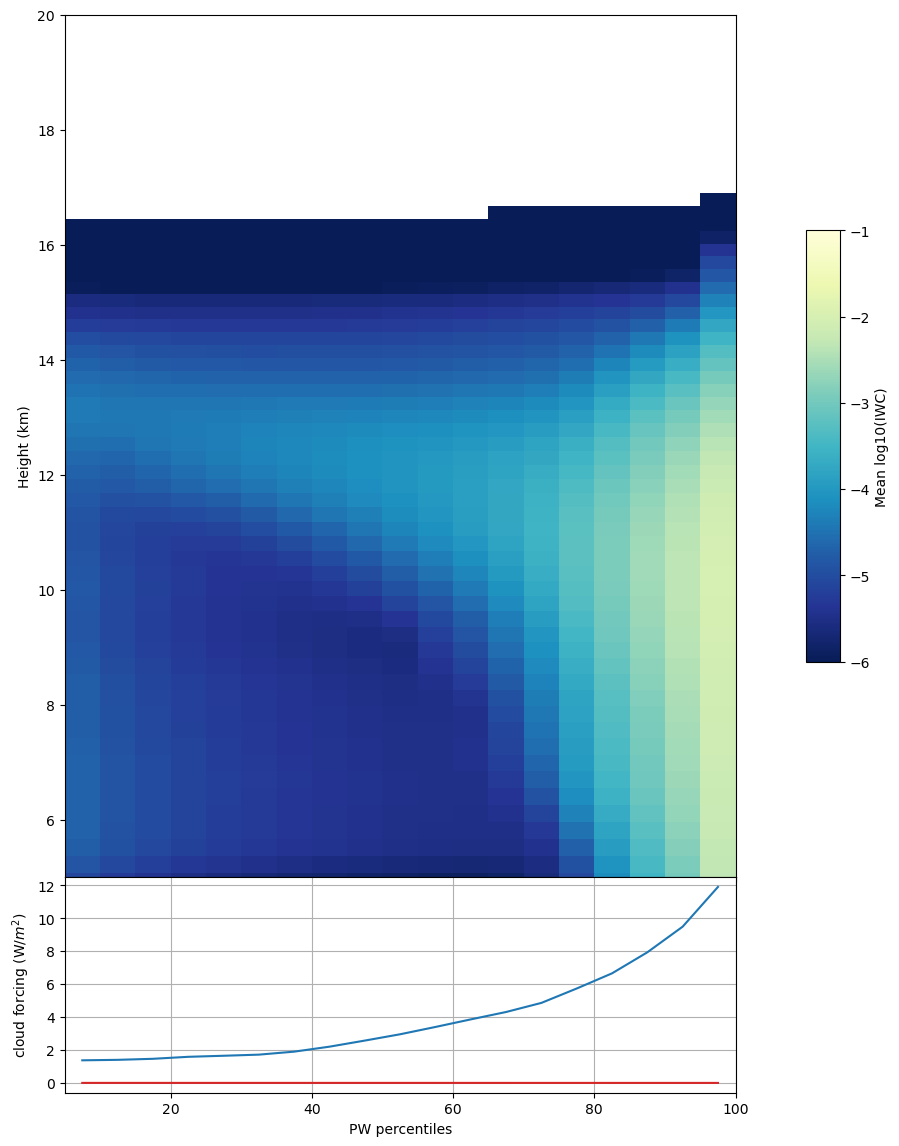

In [22]:
fig = plt.figure(figsize=(10,14))
gs = GridSpec(5, 2, figure=fig, hspace=0, width_ratios=[100,5])
ax3d = fig.add_subplot(gs[:4,0])
ax2d = fig.add_subplot(gs[-1,0])
cax  = fig.add_subplot(gs[1:3,1])

if var3d=="BCU" or var3d=="NUC":
    im = ax3d.pcolormesh(ds.bins.values, z, -np.log(ds.values.T),
                    cmap="YlGnBu_r", vmin=0, vmax=48)
elif var3d=="IWC":
    im = ax3d.pcolormesh(ds.bins.values, z, np.log10(ds.values.T)+3,
                    cmap="YlGnBu_r", vmin=-6, vmax=-1)
    var3d=f"log10({var3d})"
else:
    im = ax3d.pcolormesh(ds.bins.values, z, (ds.values.T),
                    cmap="YlGnBu_r")
ax2d.plot(ds2d.bins[1:], ds2d.LWCF[1:], color='C0')
ax2d.plot(ds2d.bins[1:], ds2d.SWCF[1:], color='C3')
ax3d.set(ylim=[5,20], xlim=[5,100], ylabel="Height (km)",
         xticklabels="")
ax2d.set(xlabel="PW percentiles", ylabel="cloud forcing (W/$m^2$)",
         xlim=[5,100])
ax2d.grid()
plt.colorbar(im, cax=cax, label=f"Mean {var3d}")
var3d=var3d.split("(")[-1][:-1]
print("saving", var3d)
plt.savefig(f"../plots/large/{var3d}_binned_by_crh_percs_cre.png")
plt.show()

# CRH percentiles for 2d variables

0 FLUT True...new subplot...(20,)...1 FSUTOA False...(20,)...2 LWCF True...new subplot...(20,)...3 SWCF False...(20,)...4 LHFLX True...new subplot...(20,)...5 SHFLX False...(20,)...6 OMEGA500 True...new subplot...(20,)...7 TMQ False...(20,)...

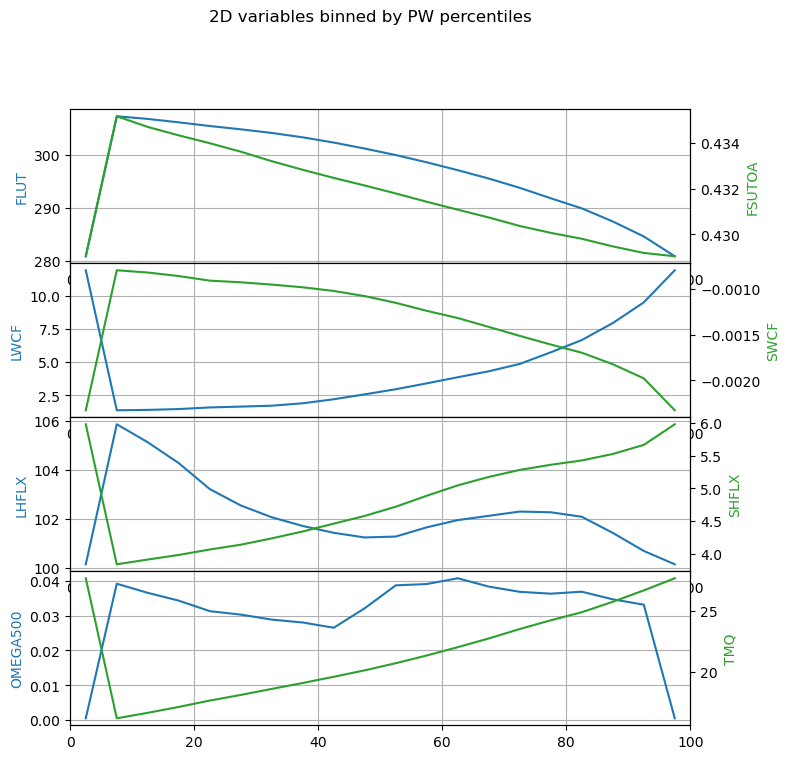

In [2]:
fig = plt.figure(figsize=(8,10))
gs = GridSpec(5, 1, figure=fig, hspace=0)

for i,var in enumerate(vars2d):
    print(i,var,i%2==0, end="...")
    if i%2==0:
        print("new subplot", end="...")
        c="C0"
        ax = fig.add_subplot(gs[i//2])
    else:
        ax=ax.twinx()
        c="C2"
    file = run_dir + run + f"_{var.lower()}_binned_by_crhp.nc"
    ds = xr.open_dataset(file)[var]
    print(ds.shape, end="...")
    ax.plot(ds.bins[:], ds[:], color=c,label=var)
    ax.set_ylabel(var, color=c)
    ax.set(xlim=[0,100])
    if i%2==0:
        ax.grid(True)
ax.set_xlabel("PW Percentiles")
fig.suptitle("2D variables binned by PW percentiles")
plt.savefig("../plots/large/vars2d_binned_by_crh_percs.png", dpi=150)
plt.show()


# A single 2d var

In [3]:
var="FSUTOA"
file = run_dir + run + f"_{var.lower()}_binned_by_crhp_daytime_last5days.nc"
fileold = run_dir + run + f"_{var.lower()}_binned_by_crhp_last5days.nc"
ds = xr.open_dataset(file)[var]
dsold = xr.open_dataset(fileold)[var]
print(ds.shape, dsold.shape, end="...")

(20,) (20,)...

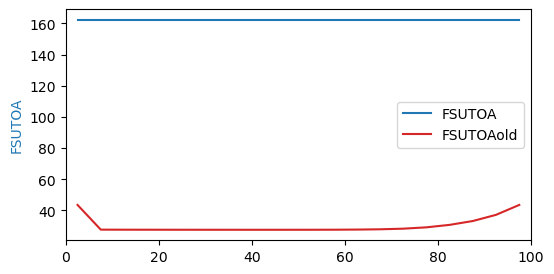

In [4]:
fig, ax = plt.subplots(1,1,figsize=(6,3))
ax.plot(ds.bins[:], ds[:], color='C0',label=var)
ax.set_ylabel(var, color='C0')
ax.set(xlim=[0,100])
ax.plot(dsold.bins[:], dsold[:], color='C3',label=var+"old")
ax.legend()
plt.show()

In [6]:
files = []
for i in range(0,100,5):
    print(xr.open_dataset(run_dir + f"temp_{var}_out_crh_bins_{i}.nc")[var].values)

[[[43.574577]]]
[[[27.721376]]]
[[[27.685013]]]
[[[27.669706]]]
[[[27.658272]]]
[[[27.65004]]]
[[[27.639854]]]
[[[27.637094]]]
[[[27.635252]]]
[[[27.638447]]]
[[[27.649426]]]
[[[27.67626]]]
[[[27.762726]]]
[[[27.941624]]]
[[[28.334488]]]
[[[29.19337]]]
[[[30.777609]]]
[[[33.247124]]]
[[[37.22309]]]
[[[43.574577]]]


In [6]:
file = run_dir + "dpscream_rce_large_3km_aa_default_TMQ_percs_2d_new.nc"
ds = xr.open_dataset(file).TMQ_percs
ds

<xarray.DataArray 'TMQ_percs' (time: 19, ncol: 147456)> Size: 22MB
[2801664 values with dtype=float64]
Coordinates:
  * time     (time) object 152B 2000-02-15 06:00:00 ... 2000-02-19 18:00:00
Dimensions without coordinates: ncol
Attributes:
    name:     column-integrated water vapor percentiles

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6,3))
ax.plot(ds.bins[:], ds[:], color='C0',label=var)
ax.set_ylabel(var, color='C0')
ax.set(xlim=[0,100])
ax.plot(dsold.bins[:], dsold[:], color='C3',label=var+"old")
ax.legend()
plt.show()